# I-Présentation de la problématique : Octroie de Crédit 

Lending Club est une société de prêt entre pairs basée aux États-Unis, dans laquelle les investisseurs fournissent des fonds aux emprunteurs potentiels et les investisseurs réalisent un profit en fonction du risque qu'ils prennent . Lending Club fournit le "pont" entre les investisseurs et les emprunteurs. Pour plus d'informations de base sur l'entreprise, veuillez consulter l'article de wikipedia sur l'entreprise : https://en.wikipedia.org/wiki/LendingClub

L'objectif du projet est de construire une application qui permet de prédire Solvabilité des clients potentiels et ainsi décider Octroi des crédits et ceci en  suivant les étapes suivantes : 
- EDA : Analyse exploratoires des données d'anciens Clients
- Data Preprocessing : Prétraitement des données pour préparation au modèle Machine Leanrning 
- Application de 10 Modèles de classification sur notre data 
- choix de 3 Modèles les plus Performants 
- Choix du Modèle Finale 
- Déploiement du Modèle via Streamlit en Local 
- Publication de l'application sur le Cloud (Heroku)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime
import time
import pickle
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
# Classification models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score , f1_score ,roc_auc_score
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 
pd.set_option("display.max_columns",None)
from sklearn.model_selection import learning_curve

import warnings
warnings.filterwarnings('ignore')

# II-EDA :Exploratory Data Analysis

In [2]:
desc=pd.read_csv("LCDataDictionary.csv")
desc.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [3]:
desc.shape

(117, 2)

In [4]:
data=pd.read_csv("lending-club-loan-data-2007-11-QueryResult.csv")
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,0.1065,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12,Fully Paid,False,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,0.837,9.0,False,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,2015-01,171.62,NaN,2016-09,744.0,740.0,False,NaN,True,INDIVIDUAL,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,0.1527,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12,Charged Off,False,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,1999-04,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,0.094,4.0,False,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,2013-04,119.66,NaN,2016-09,499.0,0.0,False,NaN,True,INDIVIDUAL,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN
2,1070078,1305201.0,6500.0,6500.0,6500.0,60 months,0.1465,153.45,C,C3,Southwest Rural metro,5 years,OWN,72000.0,Not Verified,2011-12,Fully Paid,False,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/15/11 > I had recived a...,debt_consolidation,High intrest Consolidation,853xx,AZ,16.12,0.0,1998-01,695.0,699.0,2.0,NaN,NaN,14.0,0.0,4032.0,0.206,23.0,False,0.0,0.0,7678.017673,7678.02,6500.00,1178.02,0.0,0.00,0.00,2013-06,1655.54,NaN,2015-12,734.0,730.0,False,NaN,True,INDIVIDUAL,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN


In [5]:
data.shape

(42538, 115)

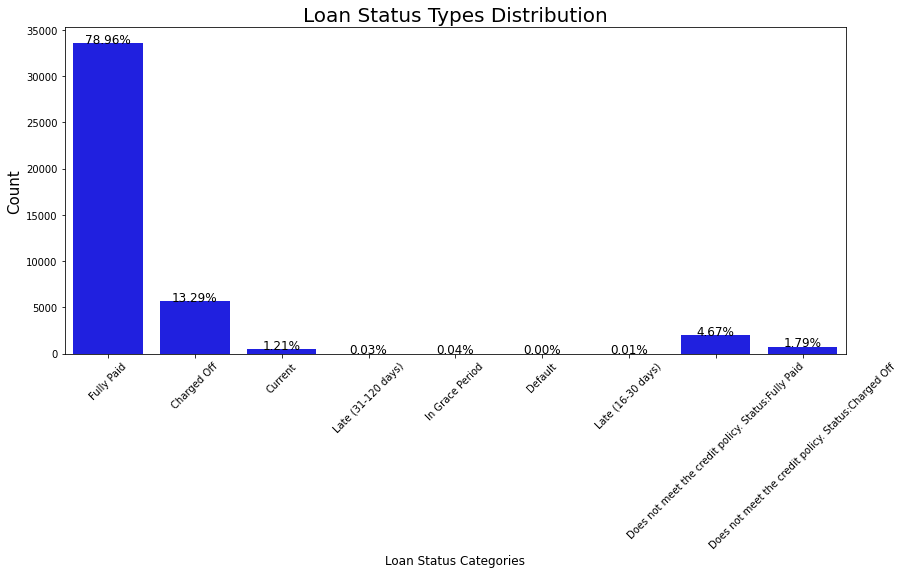

In [6]:
total = len(data)

plt.figure(figsize = (14,6))

g = sns.countplot(x="loan_status", data=data, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 

#### Pour notre variable Target , Notre interêt portera surtout sur les valeurs : Fully Paid , Charged-off

Notre étude est un sujet de classification pour prédir si un crédit sera payé(fully paid) or perdu( charged off)
on procéde à la suppression des données qui concerne des crédit en cours (current)&(In grace periode)(on est pas certain s'il sera payé dans le futur)

ce qui sont en retard du crédit a partir de 15 jours sont succeptibles de ne pas payer le crédit , car la période de grace(ne pas payer le montant mensuel pour une durée ne doit pas dépasser 15 jours)
source :https://www.crowdfundinsider.com/2017/02/96585-lending-club-alters-grace-period-borrowers/

In [7]:
data["loan_status"].replace("Does not meet the credit policy. Status:Charged Off","Charged Off",inplace=True)
data["loan_status"].replace("Does not meet the credit policy. Status:Fully Paid","Fully Paid",inplace=True)
data["loan_status"].replace("Late (31-120 days)","Charged Off",inplace=True)
data["loan_status"].replace("Late (16-30 days)","Charged Off",inplace=True)
data["loan_status"].replace("Default",inplace=True)
data=data[(data["loan_status"]!="Current")&(data["loan_status"]!="In Grace Period")]

<AxesSubplot:xlabel='loan_status', ylabel='count'>

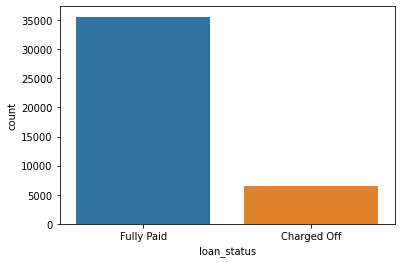

In [8]:
sns.countplot(data.loan_status)

[Text(0, 0, 'credit_card'),
 Text(1, 0, 'car'),
 Text(2, 0, 'debt_consolidation'),
 Text(3, 0, 'vacation'),
 Text(4, 0, 'moving'),
 Text(5, 0, 'medical'),
 Text(6, 0, 'other'),
 Text(7, 0, 'home_improvement'),
 Text(8, 0, 'major_purchase'),
 Text(9, 0, 'small_business'),
 Text(10, 0, 'wedding'),
 Text(11, 0, 'renewable_energy'),
 Text(12, 0, 'house'),
 Text(13, 0, 'educational')]

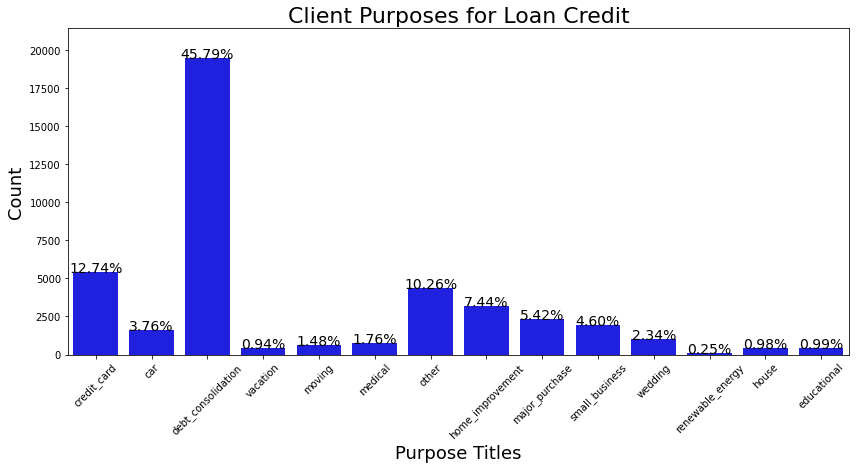

In [9]:
plt.figure(figsize=(14,6))

g = sns.countplot(x='purpose', data=data ,
                  color='blue')
g.set_title("Client Purposes for Loan Credit", fontsize=22)
g.set_xlabel("Purpose Titles", fontsize=18)
g.set_ylabel('Count', fontsize=18)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.10)
g.set_xticklabels(g.get_xticklabels(),
                  rotation=45)

Les Top 3 purposes are:

- 45.5% sont dédiés au :Debt Consolidation

- 12.74% pour payer les  Credit Card

- 7.44% pour  Home Improvement

- and les autres sont  34.32%

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

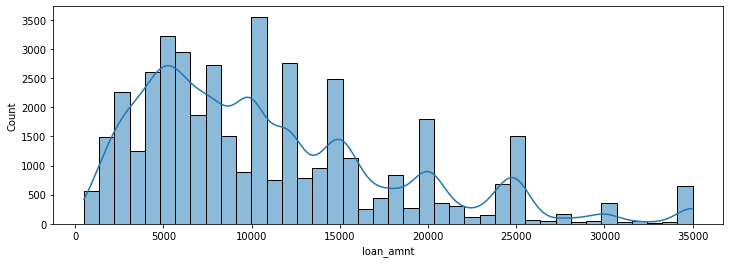

In [10]:
plt.figure(figsize=(12,4))
sns.histplot(data['loan_amnt'],bins=40,kde=True)

Text(0.5, 0, 'interest rate (%)')

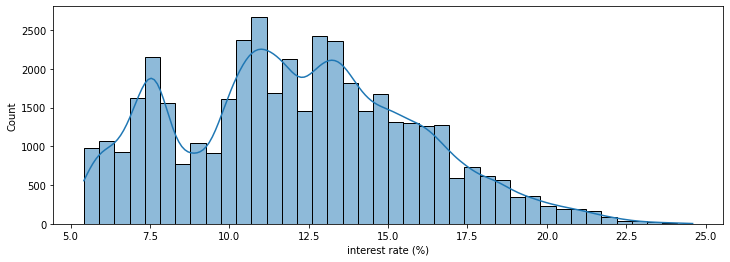

In [11]:
plt.figure(figsize=(12,4))
sns.histplot(data['int_rate']*100,bins=40,kde=True)
plt.xlabel('interest rate (%)')

- une grande partie des prêts sont des valeurs jusqu a 10.000 USD
- une grande partie des taux d'intéret prêts et entre 7% et 15 %

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

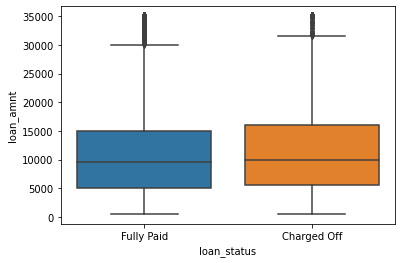

In [12]:
# CODE HERE
sns.boxplot(x='loan_status',y='loan_amnt',data=data)

<AxesSubplot:xlabel='grade'>

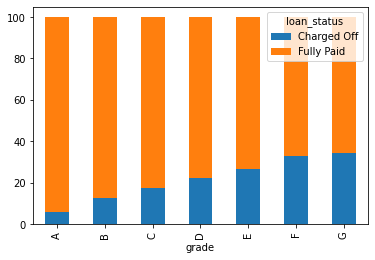

In [13]:
df_plot = data.groupby(['grade', 'loan_status']).size().reset_index().pivot(columns='loan_status', index='grade', values=0)
df_plot['sum']=df_plot['Charged Off']+df_plot['Fully Paid']
df_plot['Charged Off']=df_plot['Charged Off']/df_plot['sum']*100
df_plot['Fully Paid']=df_plot['Fully Paid']/df_plot['sum']*100
df_plot.drop('sum',axis=1,inplace=True)
df_plot.plot(kind="bar",stacked=True)

On remarque plus on diminue dans le grade , plus le risque de non solvabilité augmente 

# III-Data Preprocessing : Prétraitement des données pour préparation au modèle Machine Leanrning

### 1-DATA Cleaning

<AxesSubplot:>

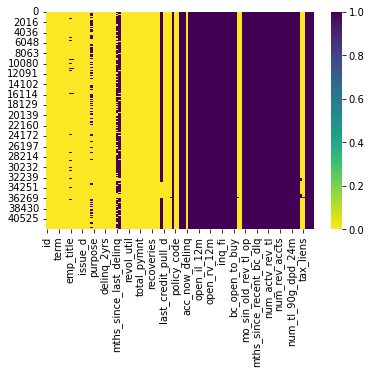

In [14]:
sns.heatmap(data.isna(),cmap="viridis_r")

In [15]:
data.isna().sum().sort_values(ascending=False).reset_index()

,index,0
0,annual_inc_joint,42009
1,mo_sin_rcnt_rev_tl_op,42009
2,mo_sin_old_il_acct,42009
3,bc_util,42009
4,bc_open_to_buy,42009
...,...,...
110,last_pymnt_amnt,3
111,dti,3
112,addr_state,3
113,zip_code,3


In [16]:
# 54 colonnes toutes les valeurs sont NULL:
nb_null=data.isna().sum().sort_values(ascending=False).reset_index()
nb_null.columns=["cols","nb nul values"]
nb_null[nb_null["nb nul values"]==len(data)]

,cols,nb nul values
0,annual_inc_joint,42009
1,mo_sin_rcnt_rev_tl_op,42009
2,mo_sin_old_il_acct,42009
3,bc_util,42009
4,bc_open_to_buy,42009
5,avg_cur_bal,42009
6,acc_open_past_24mths,42009
7,inq_last_12m,42009
8,total_cu_tl,42009
9,inq_fi,42009


In [17]:
to_drop=nb_null[nb_null["nb nul values"]==len(data)]["cols"]

In [18]:
#Suppresion des colonnes ayant 100 %  de valeurs NULL :
data1=data.drop(to_drop,axis=1)
data1.shape

(42009, 61)

<AxesSubplot:>

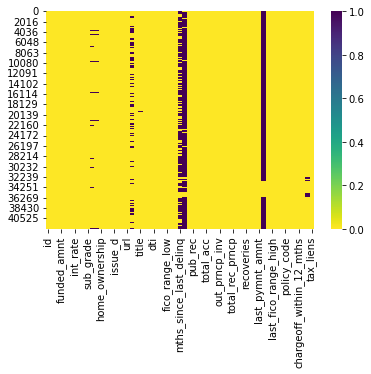

In [19]:
sns.heatmap(data1.isna(),cmap="viridis_r")

In [20]:
nb_null=data1.isna().sum().sort_values(ascending=False).reset_index()
nb_null.columns=["cols","nb nul values"]
nb_null.head(10)

,cols,nb nul values
0,next_pymnt_d,39242
1,mths_since_last_record,38375
2,mths_since_last_delinq,26563
3,desc,13101
4,emp_title,2590
5,pub_rec_bankruptcies,1368
6,emp_length,1095
7,chargeoff_within_12_mths,148
8,collections_12_mths_ex_med,148
9,tax_liens,108


In [21]:
0.01*len(data)

420.09000000000003

In [22]:
# On supprime les données ayant + que 1% de données Null par colonnes :
to_drop=nb_null[nb_null["nb nul values"]>=0.01*len(data1)]["cols"]
data2=data1.drop(to_drop,axis=1)
data2.shape

(42009, 54)

<AxesSubplot:>

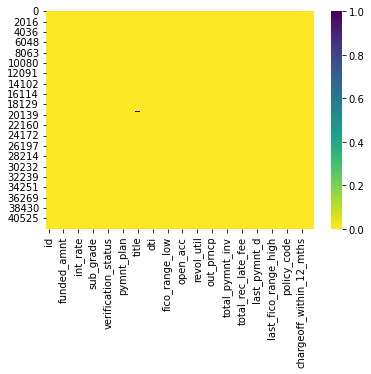

In [23]:
sns.heatmap(data2.isna(),cmap="viridis_r")

In [24]:
nb_null=data2.isna().sum().sort_values(ascending=False).reset_index()
nb_null.columns=["cols","nb nul values"]
nb_null.head(10)

,cols,nb nul values
0,chargeoff_within_12_mths,148
1,collections_12_mths_ex_med,148
2,tax_liens,108
3,revol_util,93
4,last_pymnt_d,86
5,delinq_2yrs,32
6,delinq_amnt,32
7,acc_now_delinq,32
8,total_acc,32
9,pub_rec,32


In [25]:
desc[desc["LoanStatNew"]=="chargeoff_within_12_mths"]

,LoanStatNew,Description
10,chargeoff_within_12_mths,Number of charge-offs within 12 months


In [26]:
len(data2)

42009

In [27]:
# Valeurs comprises dans la colonne chargeoff_within_12_mths
print("unique values")
print(data2["chargeoff_within_12_mths"].unique())
print("nb par valeurs")
print(data2["chargeoff_within_12_mths"].value_counts())

unique values
[False nan]
nb par valeurs
False    41861
Name: chargeoff_within_12_mths, dtype: int64


In [28]:
desc[desc["LoanStatNew"]=="collections_12_mths_ex_med"]

,LoanStatNew,Description
12,collections_12_mths_ex_med,Number of collections in 12 months excluding m...


In [29]:
# Valeurs comprises dans la colonne chargeoff_within_12_med
print("unique values")
print(data2["collections_12_mths_ex_med"].unique())
print("nb par valeurs")
print(data2["collections_12_mths_ex_med"].value_counts())

unique values
[False nan]
nb par valeurs
False    41861
Name: collections_12_mths_ex_med, dtype: int64


#### On remarque que pour les 2 colonnes , la majorité des valeurs sont False  , si  on remplie les autres colonnes avec false , ca ne donnera aucune information pour notre projet de classification 

In [30]:
data2=data2.drop("collections_12_mths_ex_med",axis=1)
data2=data2.drop("chargeoff_within_12_mths",axis=1)

In [31]:
nb_null=data2.isna().sum().sort_values(ascending=False).reset_index()
nb_null.columns=["cols","nb nul values"]
nb_null.head(10)

,cols,nb nul values
0,tax_liens,108
1,revol_util,93
2,last_pymnt_d,86
3,delinq_2yrs,32
4,delinq_amnt,32
5,acc_now_delinq,32
6,total_acc,32
7,pub_rec,32
8,open_acc,32
9,earliest_cr_line,32


In [32]:
desc[desc["LoanStatNew"]=="tax_liens"]

,LoanStatNew,Description
93,tax_liens,Number of tax liens


In [33]:
data2["tax_liens"].value_counts()

False    41900
True         1
Name: tax_liens, dtype: int64

In [34]:
data2=data2.drop("tax_liens",axis=1)

In [35]:
desc[desc["LoanStatNew"]=="revol_util"]

,LoanStatNew,Description
91,revol_util,"Revolving line utilization rate, or the amount..."


In [36]:
data2["revol_util"].value_counts()

0.0000    1062
0.4070      65
0.0020      64
0.6300      63
0.0010      61
          ... 
0.5422       1
0.3877       1
0.0485       1
0.3688       1
0.0083       1
Name: revol_util, Length: 1119, dtype: int64

In [37]:
revol_mean=data2["revol_util"].mean()
data2["revol_util"]=data2["revol_util"].fillna(revol_mean)

In [38]:
nb_null=data2.isna().sum().sort_values(ascending=False).reset_index()
nb_null.columns=["cols","nb nul values"]
nb_null.head(10)

,cols,nb nul values
0,last_pymnt_d,86
1,delinq_amnt,32
2,inq_last_6mths,32
3,total_acc,32
4,earliest_cr_line,32
5,delinq_2yrs,32
6,pub_rec,32
7,open_acc,32
8,acc_now_delinq,32
9,title,16


In [39]:
desc[desc["LoanStatNew"]=="last_pymnt_d"]

,LoanStatNew,Description
40,last_pymnt_d,Last month payment was received


In [40]:
data2["last_pymnt_d"].value_counts()

2013-03    1070
2014-12     949
2013-05     943
2013-02     906
2012-03     893
           ... 
2008-06      20
2008-03      18
2008-01      11
2008-02       8
2007-12       2
Name: last_pymnt_d, Length: 106, dtype: int64

In [41]:
data2[data2["loan_status"]=='Fully Paid']["last_pymnt_d"].isnull().sum()

0

#### Aucun  crédit payé ne contient une valeur NULL dans la colonne la last_pymnt_d

In [42]:
data2[data2["last_pymnt_d"].isnull()]["loan_status"].unique()

array(['Charged Off', nan], dtype=object)

#### toutes  valeurs NULL de la colonne last_pymnt_d sont dans les crédit non payés , on remplace donc les valeurs NULL de last_pymnt_d par les dates les plus récurentes parmi les crédits non payés 

In [43]:
data2[(data2["loan_status"]=='Charged Off')]["last_pymnt_d"].value_counts().reset_index()

,index,last_pymnt_d
0,2012-10,180
1,2012-07,171
2,2012-06,161
3,2012-02,160
4,2012-08,157
...,...,...
101,2016-07,4
102,2016-05,3
103,2008-01,3
104,2016-06,2


In [44]:
df=data2[(data2["loan_status"]=='Charged Off')]
value=df["last_pymnt_d"].value_counts().index[0]
print(value)

2012-10


In [45]:
data2["last_pymnt_d"]=data2["last_pymnt_d"].fillna(value)

In [46]:
nb_null=data2.isna().sum().sort_values(ascending=False).reset_index()
nb_null.columns=["cols","nb nul values"]
nb_null.head(10)

,cols,nb nul values
0,delinq_amnt,32
1,open_acc,32
2,pub_rec,32
3,earliest_cr_line,32
4,delinq_2yrs,32
5,total_acc,32
6,inq_last_6mths,32
7,acc_now_delinq,32
8,title,16
9,last_credit_pull_d,7


### 32 lignes sur 42538 donne 75 /1 million de crédits , on peut donc procéder a la suppression de ces lignes 

In [47]:
data2=data2.dropna()

<AxesSubplot:>

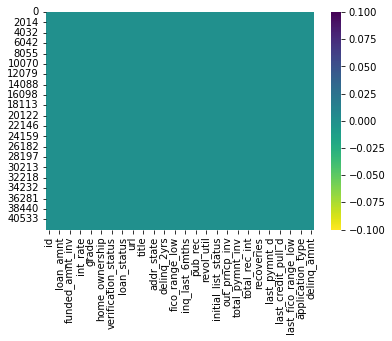

In [48]:
sns.heatmap(data2.isna(),cmap="viridis_r")

### 2-Data Preprocessing

<AxesSubplot:xlabel='loan_status', ylabel='count'>

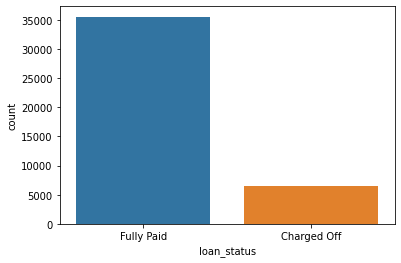

In [49]:
sns.countplot(data2["loan_status"])

<AxesSubplot:>

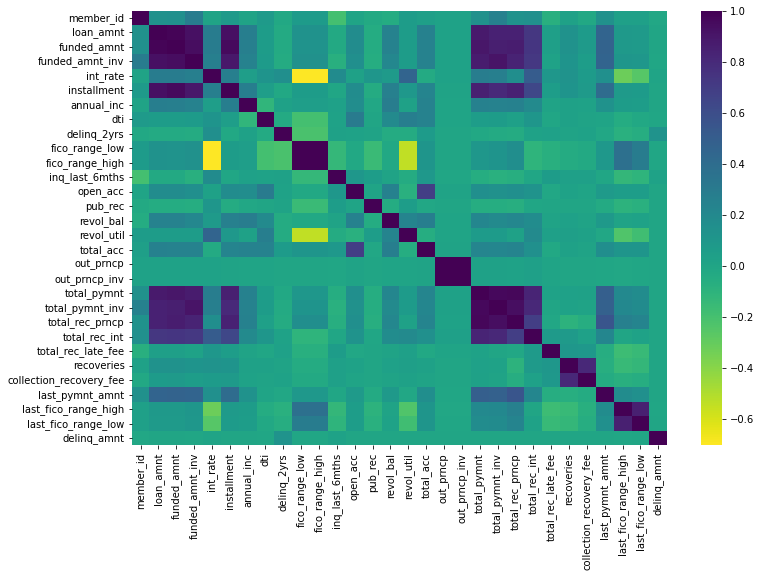

In [50]:
plt.figure(figsize=(12,8))
sns.heatmap(data2.corr(),cmap="viridis_r")

In [51]:
data2.iloc[0]["id"]

1077501

In [52]:
data2.iloc[0]["url"]

'https://lendingclub.com/browse/loanDetail.action?loan_id=1077501'

#### Les 2 colonnes id et url fournissent la meme information et de , L id est la fin de de L'URL 
#### De mem la colonne id ne fournira aucune info pour nos futures modeles 

In [53]:
data2=data2.drop(["id","url"] ,axis=1)

In [54]:
# Title  n'est pas important , on va utiliser la variable purpose
data2.drop(["title"], axis=1, inplace=True)

In [55]:
# la colonne terms contient soit 36 months ou bien 60 months
data2["term"]= data2['term'].map(lambda x: x.rstrip('months'))
data2["term"]= data2["term"].astype("int")

In [56]:
data2["term"]

0        36
1        60
2        60
3        36
4        36
         ..
42533    36
42534    60
42535    36
42536    36
42537    60
Name: term, Length: 41961, dtype: int32

In [57]:
# on a pas besoin de l'id du membre'
data2.drop(["member_id"], axis=1, inplace=True)

#### on analyse depuis le graph de corrélation  , s'il y as des doublons d'informations 

In [58]:
# 100% corrélés fico_range_high et 'fico_range_low'
data2[['fico_range_high','fico_range_low']].corr()

,fico_range_high,fico_range_low
fico_range_high,1.0,1.0
fico_range_low,1.0,1.0


In [59]:
sum(data2['fico_range_high']-data2['fico_range_low']-4)

0.0

In [60]:
data2.drop(['fico_range_low'], axis=1, inplace=True)

In [61]:
data2.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt'],
      dtype='object')

In [62]:
data2[['last_fico_range_high','last_fico_range_low']].corr()

,last_fico_range_high,last_fico_range_low
last_fico_range_high,1.000000,0.850837
last_fico_range_low,0.850837,1.000000


In [63]:
print(desc[desc['LoanStatNew']=="last_fico_range_low"]["Description"][38])

The lower boundary range the borrower’s last FICO pulled belongs to.


In [64]:
data2.drop(['last_fico_range_low'], axis=1, inplace=True)

In [65]:
desc[desc['LoanStatNew']=='zip_code']

,LoanStatNew,Description
114,zip_code,The first 3 numbers of the zip code provided b...


In [66]:
desc[desc['LoanStatNew']=='addr_state']

,LoanStatNew,Description
2,addr_state,The state provided by the borrower in the loan...


#### on a les  données  address state and zip code on supprime  ces colonnes concernent la position géographique de la personne et n'influence pas la solvabilité du client


In [67]:
#on a les  données  address state and zip code on supprime  ces colonnes concernent la position géographique de la personne et n'influence pas la solvabilité du client
data2.drop(["addr_state"], axis=1, inplace=True)
data2.drop(["zip_code"], axis=1, inplace=True)

In [68]:
# la colonne subgrade contient la doonée de grade , on supprime grade .
data2.drop(["grade"], axis=1, inplace=True)

In [69]:
data2["pymnt_plan"].value_counts()

False    41960
True         1
Name: pymnt_plan, dtype: int64

In [70]:
# On supprime la colonne  pymnt_plan , la majorité sont false 
data2.drop(["pymnt_plan"], axis=1, inplace=True)

In [71]:
data2["application_type"].value_counts()

INDIVIDUAL    41961
Name: application_type, dtype: int64

In [72]:
# On supprime la colonne  application_type , tous sont individual
data2.drop(["application_type"], axis=1, inplace=True)

In [73]:
data2["policy_code"].value_counts()

True    41961
Name: policy_code, dtype: int64

In [74]:
# On supprime la colonne  policy_code , tous sont True
data2.drop(["policy_code"], axis=1, inplace=True)

In [75]:
data2["initial_list_status"].value_counts()

False    41961
Name: initial_list_status, dtype: int64

In [76]:
# On supprime la colonne  initial_list_status , tous sont  False
data2.drop(["initial_list_status"], axis=1, inplace=True)

In [77]:
data2.shape

(41961, 38)

In [78]:
data2["verification_status"].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

#### la colonne "verification_status" contient  'Source Verified' et 'Verified' qui signifient la meme chose 

In [79]:
data2["verification_status"].replace('Source Verified','Verified' , inplace=True)

In [80]:
data2["verification_status"].unique()

array(['Verified', 'Not Verified'], dtype=object)

In [81]:
data2["delinq_amnt"].value_counts()

0.0       41959
27.0          1
6053.0        1
Name: delinq_amnt, dtype: int64

In [82]:
# On supprime la colonne  delinq_amnt , tous sont  0 
data2.drop(["delinq_amnt"], axis=1, inplace=True)

In [83]:
data2["acc_now_delinq"].value_counts()

False    41957
True         4
Name: acc_now_delinq, dtype: int64

In [84]:
data2.drop(["acc_now_delinq"], axis=1, inplace=True)

In [85]:
# "out_prncp",'out_prncp_inv' sont  99.9999% 
data2[["out_prncp",'out_prncp_inv']].corr()

,out_prncp,out_prncp_inv
out_prncp,1.000000,0.999989
out_prncp_inv,0.999989,1.000000


In [86]:
data2.drop(['out_prncp_inv'], axis=1, inplace=True)

In [87]:
data2.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_high', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high'],
      dtype='object')

In [88]:
data2['out_prncp'].value_counts()

0.00       41943
2446.98        1
104.13         1
795.80         1
1129.50        1
3126.61        1
1464.17        1
2603.78        1
653.20         1
447.09         1
122.44         1
409.05         1
1749.05        1
30.54          1
71.53          1
1206.14        1
564.35         1
932.39         1
72.14          1
Name: out_prncp, dtype: int64

In [89]:
data2.drop(['out_prncp'], axis=1, inplace=True)

<AxesSubplot:>

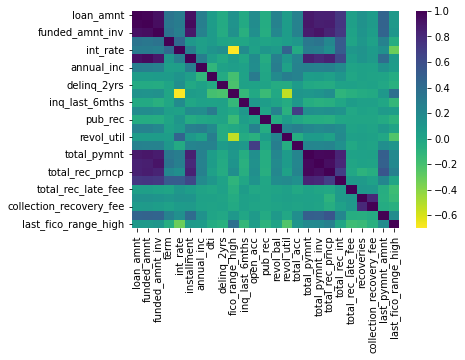

In [90]:
sns.heatmap(data2.corr(),cmap="viridis_r")

In [91]:
print(desc[desc['LoanStatNew']=='loan_amnt']["Description"][41])

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [92]:
print(desc[desc['LoanStatNew']=='funded_amnt']["Description"][23])

The total amount committed to that loan at that point in time.


In [93]:
data2[['loan_amnt', 'funded_amnt']].corr()

,loan_amnt,funded_amnt
loan_amnt,1.000000,0.981529
funded_amnt,0.981529,1.000000


#### On Procéde a la suppression  de la colonne 'funded_amnt' vue sa forte corrélation avec la variable  'loan_amnt'

In [94]:
data2.drop(['funded_amnt'], axis=1, inplace=True)

In [95]:
data2[["loan_amnt","funded_amnt_inv"]].corr()

,loan_amnt,funded_amnt_inv
loan_amnt,1.000000,0.927831
funded_amnt_inv,0.927831,1.000000


#### On Procéde a la suppression  de la colonne 'funded_amnt' vue sa forte corrélation avec la variable 'loan_amnt'

In [96]:
data2.drop(['funded_amnt_inv'], axis=1, inplace=True)

In [97]:
data2[["total_pymnt_inv","total_pymnt"]].corr()

,total_pymnt_inv,total_pymnt
total_pymnt_inv,1.000000,0.963115
total_pymnt,0.963115,1.000000


In [98]:
data2.drop(['total_pymnt_inv'], axis=1, inplace=True)

In [99]:
data2[["loan_amnt","installment"]].corr()

,loan_amnt,installment
loan_amnt,1.000000,0.931189
installment,0.931189,1.000000


In [100]:
data2.drop(['installment'], axis=1, inplace=True)

In [101]:
data2["total_pymnt"]=data2["total_pymnt"].apply(lambda x : round(x,2))

#### On Procède à la suppression des colonnes dates 

In [102]:
dates_cols=["issue_d","last_credit_pull_d","last_pymnt_d","earliest_cr_line"]
data2.drop(dates_cols,axis=1,inplace=True)

<AxesSubplot:>

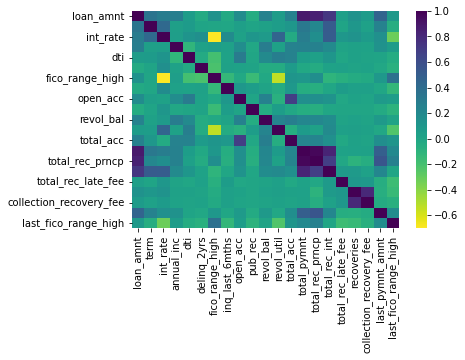

In [103]:
sns.heatmap(data2.corr(),cmap="viridis_r")

### 3-  Encoding et Normalisation 

<AxesSubplot:ylabel='None'>

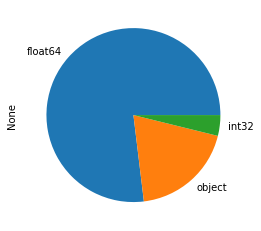

In [104]:
data2.dtypes.value_counts().plot.pie()

In [105]:
# subdiviser la data  en données Categoriques /numeriques  :
cat_data=[]
num_data=[]
for i ,c in enumerate(data2.dtypes): 
    if c=='object': 
        cat_data.append(data2.iloc[:,i])
    else:
        num_data.append(data2.iloc[:,i])
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()

In [106]:
cat_data

,sub_grade,home_ownership,verification_status,loan_status,purpose
0,B2,RENT,Verified,Fully Paid,credit_card
1,C4,RENT,Verified,Charged Off,car
2,C3,OWN,Not Verified,Fully Paid,debt_consolidation
3,B1,RENT,Not Verified,Charged Off,debt_consolidation
4,C2,RENT,Verified,Fully Paid,debt_consolidation
...,...,...,...,...,...
42533,C2,MORTGAGE,Verified,Fully Paid,wedding
42534,C2,RENT,Verified,Fully Paid,debt_consolidation
42535,D1,RENT,Not Verified,Fully Paid,other
42536,E2,OWN,Verified,Fully Paid,other


In [107]:
cat_data.nunique()

sub_grade              35
home_ownership          5
verification_status     2
loan_status             2
purpose                14
dtype: int64

In [108]:
num_data.head(1).T.index

Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high'],
      dtype='object')

In [109]:
cat_data.head()

,sub_grade,home_ownership,verification_status,loan_status,purpose
0,B2,RENT,Verified,Fully Paid,credit_card
1,C4,RENT,Verified,Charged Off,car
2,C3,OWN,Not Verified,Fully Paid,debt_consolidation
3,B1,RENT,Not Verified,Charged Off,debt_consolidation
4,C2,RENT,Verified,Fully Paid,debt_consolidation


In [110]:
#transform categorical variables into 0,1,2.....
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for item in cat_data : 
    cat_data[item]=le.fit_transform(cat_data[item])
    # Sauvegarde des modèles PKL encoder pour usage Streamlit
    pickle.dump(le,open(f"encoder_{item}.pkl","wb"))

 balancing data 
selection de variable 
encoding labelEncoder
suppression des outliers 

In [111]:
cat_data

,sub_grade,home_ownership,verification_status,loan_status,purpose
0,6,4,1,1,1
1,13,4,1,0,0
2,12,3,0,1,2
3,5,4,0,0,2
4,11,4,1,1,2
...,...,...,...,...,...
42533,11,0,1,1,13
42534,11,4,1,1,2
42535,15,4,0,1,9
42536,21,3,1,1,9


In [112]:
num_data

,loan_amnt,term,int_rate,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high
0,5000.0,36.0,0.1065,24000.0,27.65,0.0,739.0,1.0,3.0,0.0,13648.0,0.837,9.0,5863.16,5000.00,863.16,0.0,0.00,0.0000,171.62,744.0
1,2500.0,60.0,0.1527,30000.0,1.00,0.0,744.0,5.0,3.0,0.0,1687.0,0.094,4.0,1008.71,456.46,435.17,0.0,117.08,1.1100,119.66,499.0
2,6500.0,60.0,0.1465,72000.0,16.12,0.0,699.0,2.0,14.0,0.0,4032.0,0.206,23.0,7678.02,6500.00,1178.02,0.0,0.00,0.0000,1655.54,734.0
3,6200.0,36.0,0.0991,25000.0,20.64,0.0,714.0,2.0,7.0,0.0,6533.0,0.477,12.0,2452.22,1700.79,493.16,0.0,258.27,2.5400,199.80,574.0
4,14000.0,36.0,0.1427,35000.0,8.40,0.0,684.0,1.0,12.0,0.0,13018.0,0.657,30.0,16745.80,14000.00,2745.80,0.0,0.00,0.0000,4746.25,794.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,5000.0,36.0,0.1349,113000.0,12.96,0.0,669.0,0.0,10.0,0.0,64186.0,0.802,24.0,6088.78,5000.00,1088.78,0.0,0.00,0.0000,851.36,719.0
42534,14975.0,60.0,0.1349,49100.0,15.71,0.0,729.0,1.0,8.0,0.0,11312.0,0.390,21.0,20468.31,14975.00,5493.31,0.0,0.00,0.0000,3606.66,599.0
42535,3600.0,36.0,0.1562,132000.0,21.62,2.0,664.0,0.0,8.0,0.0,16250.0,0.833,30.0,4531.99,3600.00,931.99,0.0,0.00,0.0000,137.15,719.0
42536,15000.0,36.0,0.1839,33600.0,14.25,0.0,684.0,0.0,3.0,0.0,2038.0,0.970,8.0,19628.05,15000.00,4628.05,0.0,0.00,0.0000,568.34,709.0


In [113]:
data3=pd.concat([cat_data,num_data],axis=1)

In [114]:
data3

,sub_grade,home_ownership,verification_status,loan_status,purpose,loan_amnt,term,int_rate,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high
0,6,4,1,1,1,5000.0,36.0,0.1065,24000.0,27.65,0.0,739.0,1.0,3.0,0.0,13648.0,0.837,9.0,5863.16,5000.00,863.16,0.0,0.00,0.0000,171.62,744.0
1,13,4,1,0,0,2500.0,60.0,0.1527,30000.0,1.00,0.0,744.0,5.0,3.0,0.0,1687.0,0.094,4.0,1008.71,456.46,435.17,0.0,117.08,1.1100,119.66,499.0
2,12,3,0,1,2,6500.0,60.0,0.1465,72000.0,16.12,0.0,699.0,2.0,14.0,0.0,4032.0,0.206,23.0,7678.02,6500.00,1178.02,0.0,0.00,0.0000,1655.54,734.0
3,5,4,0,0,2,6200.0,36.0,0.0991,25000.0,20.64,0.0,714.0,2.0,7.0,0.0,6533.0,0.477,12.0,2452.22,1700.79,493.16,0.0,258.27,2.5400,199.80,574.0
4,11,4,1,1,2,14000.0,36.0,0.1427,35000.0,8.40,0.0,684.0,1.0,12.0,0.0,13018.0,0.657,30.0,16745.80,14000.00,2745.80,0.0,0.00,0.0000,4746.25,794.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,11,0,1,1,13,5000.0,36.0,0.1349,113000.0,12.96,0.0,669.0,0.0,10.0,0.0,64186.0,0.802,24.0,6088.78,5000.00,1088.78,0.0,0.00,0.0000,851.36,719.0
42534,11,4,1,1,2,14975.0,60.0,0.1349,49100.0,15.71,0.0,729.0,1.0,8.0,0.0,11312.0,0.390,21.0,20468.31,14975.00,5493.31,0.0,0.00,0.0000,3606.66,599.0
42535,15,4,0,1,9,3600.0,36.0,0.1562,132000.0,21.62,2.0,664.0,0.0,8.0,0.0,16250.0,0.833,30.0,4531.99,3600.00,931.99,0.0,0.00,0.0000,137.15,719.0
42536,21,3,1,1,9,15000.0,36.0,0.1839,33600.0,14.25,0.0,684.0,0.0,3.0,0.0,2038.0,0.970,8.0,19628.05,15000.00,4628.05,0.0,0.00,0.0000,568.34,709.0


In [115]:
data3.columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'loan_status',
       'purpose', 'loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti',
       'delinq_2yrs', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high'],
      dtype='object')

# IV- Application de 10 Modèles de classification sur notre data

In [116]:
X=data3.drop("loan_status",axis=1)
y=data3["loan_status"]

In [117]:
data3.head(1).to_csv("test.csv")

In [118]:
# divide data into test,train data: Echantilon startifié comme dans le module statistique
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.25,random_state=42)
for train , test in sss.split(X,y): 
    X_train,X_test=X.iloc[train],X.iloc[test]
    y_train,y_test=y.iloc[train],y.iloc[test]

#### Le scaling a été entrainé sur les données train et aprés a permis de transformé les 2 données : X_train et X_test pour objectif d'éviter le data leakage entre le train set et le test set 

In [119]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
# Sauvegarde du modèle scaler pour Usage sur Streamlit 
pickle.dump(scaler,open("scaler.pkl","wb"))

In [120]:
#Choix du Modèle :Regression Logistique / KNN/ Decision Tree : 
models={'1-LogisticRegression':LogisticRegression(random_state=42),
        '2-KNeighborsClassifier':KNeighborsClassifier(),
        '3-DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=42),
        "4-Support Vector Machine" : SVC() ,
        "5-Naive Bayes (Gaussian)" : GaussianNB() , 
        "6-Naive Bayes (Multinomial)" : MultinomialNB() ,
          "7-Stochastic Gradient Descent Classifier" : SGDClassifier(), 
        "8-Random Forest": RandomForestClassifier() , 
        "9-Gradient Boosting Classifier" :  GradientBoostingClassifier() , 
        "10-Adaptive Boosting Classifier " : AdaBoostClassifier() 
       }
# Accuracy Function : 
def f1_sc(y_true,y_pred):
    sc=f1_score(y_test,y_pred) 
    print(f'La precision du Modèle est :{round(sc,4)}')
    
# Run the models (train , test , evaluate): 
def train_test_eval(models,X_train,y_train,X_test, y_test):
    for name , model in models.items() :
        print(name,':')
        model.fit(X_train,y_train)
        f1_sc(y_test,model.predict(X_test))
        print('-'*30)

In [121]:
train_test_eval(models,X_train,y_train,X_test, y_test)
#the best model used here is the Logistic Regression

1-LogisticRegression :
La precision du Modèle est :0.9806
------------------------------
2-KNeighborsClassifier :
La precision du Modèle est :0.9518
------------------------------
3-DecisionTreeClassifier :
La precision du Modèle est :0.9773
------------------------------
4-Support Vector Machine :
La precision du Modèle est :0.9834
------------------------------
5-Naive Bayes (Gaussian) :
La precision du Modèle est :0.975
------------------------------
6-Naive Bayes (Multinomial) :
La precision du Modèle est :0.9203
------------------------------
7-Stochastic Gradient Descent Classifier :
La precision du Modèle est :0.9788
------------------------------
8-Random Forest :
La precision du Modèle est :0.9956
------------------------------
9-Gradient Boosting Classifier :
La precision du Modèle est :0.9959
------------------------------
10-Adaptive Boosting Classifier  :
La precision du Modèle est :0.9961
------------------------------


### D'aprés le choix du F1 Score  : les Top 3 modèles sont : 
#### - Random Forest  :  99,57 %
#### - Gradient Boosting Classifier :  99,59 %
#### -Adaptive Boosting Classifier :  98,61 %

# V- choix de 3 Modèles les plus Performants

## 1- Gradient Boosting Classifier

In [122]:
model=GradientBoostingClassifier(random_state=42)

### a- Unblanced Data

In [123]:
def evaluation(model , X_train,y_train):
    model.fit(X_train,y_train)
    Ypred=model.predict(X_test)
   
    print(confusion_matrix(y_test,Ypred))
    print(classification_report(y_test, Ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=5,scoring='f1', train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train score',color="red")
    plt.plot(N, val_score.mean(axis=1), label='validation score',color="blue")
    plt.legend

    

[[1543   63]
 [  10 8875]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1606
           1       0.99      1.00      1.00      8885

    accuracy                           0.99     10491
   macro avg       0.99      0.98      0.99     10491
weighted avg       0.99      0.99      0.99     10491



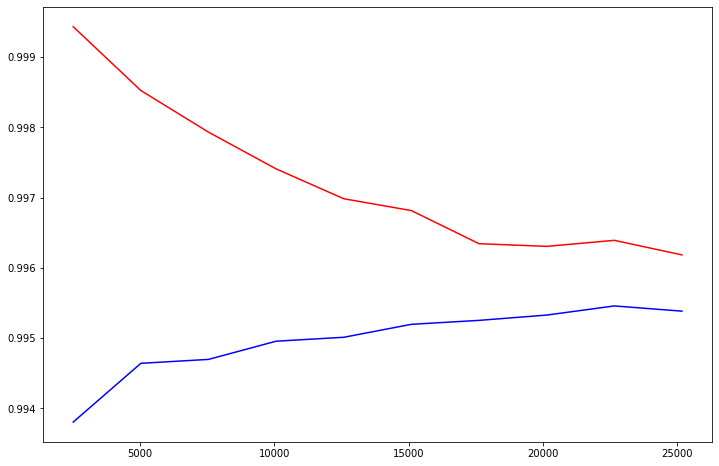

In [124]:
evaluation(model , X_train , y_train)

### b- Model with data balanced 

In [125]:
#!pip install imblearn

In [126]:
# from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

# Over Sampling
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train.ravel())

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 26652
Before OverSampling, counts of label '0': 4818 

After OverSampling, counts of label '1': 26652
After OverSampling, counts of label '0': 26652


[[1579   27]
 [  27 8858]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1606
           1       1.00      1.00      1.00      8885

    accuracy                           0.99     10491
   macro avg       0.99      0.99      0.99     10491
weighted avg       0.99      0.99      0.99     10491



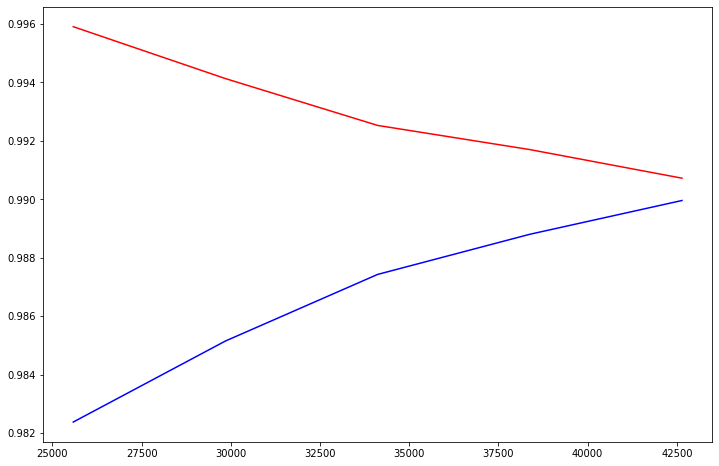

In [127]:
model=GradientBoostingClassifier(random_state=42)
evaluation(model , X_train_res , y_train_res)

In [128]:
# from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train==0)))

# Over Sampling
ros = RandomUnderSampler(random_state=42)
X_train_res1, y_train_res1 = ros.fit_resample(X_train, y_train.ravel())

print("After UnderSampling, counts of label '1': {}".format(sum(y_train_res1==1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_res1==0)))

Before UnderSampling, counts of label '1': 26652
Before UnderSampling, counts of label '0': 4818 

After UnderSampling, counts of label '1': 4818
After UnderSampling, counts of label '0': 4818


[[1578   28]
 [  28 8857]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1606
           1       1.00      1.00      1.00      8885

    accuracy                           0.99     10491
   macro avg       0.99      0.99      0.99     10491
weighted avg       0.99      0.99      0.99     10491



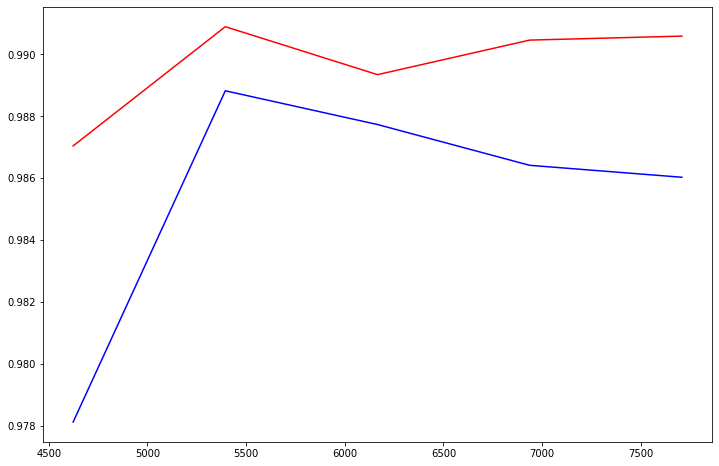

In [129]:
model=GradientBoostingClassifier(random_state=42)
evaluation(model , X_train_res1 , y_train_res1)

### Pour le 1 ere modèle( Gradient Boosting Classifier) , le fait de balancer les données n 'influence pas bcp les résultats du modèle , mais l 'usage du OverSampling  donne au minimum d erreur de prédiction de 0 FN (15 vs 37 erreurs de prédiction 

In [130]:
Model1=GradientBoostingClassifier(random_state=42)
Model1.fit(X_train_res, y_train_res)

GradientBoostingClassifier(random_state=42)

## 2-  Random Forest 

### a- Unblanced Data

[[1531   75]
 [   5 8880]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1606
           1       0.99      1.00      1.00      8885

    accuracy                           0.99     10491
   macro avg       0.99      0.98      0.99     10491
weighted avg       0.99      0.99      0.99     10491



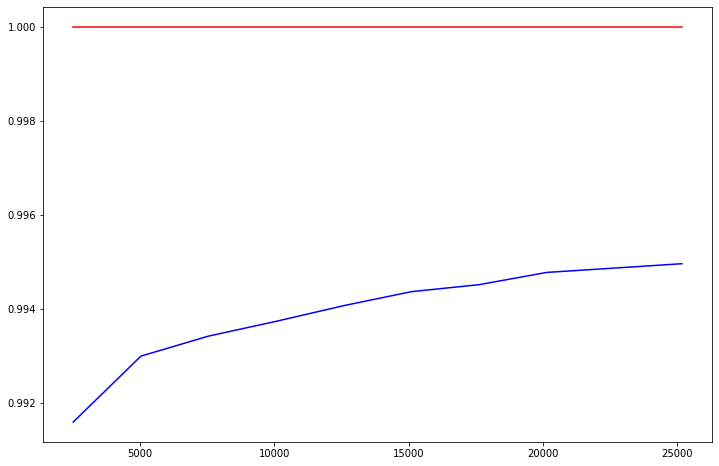

In [131]:
model=RandomForestClassifier(random_state=42)
evaluation(model , X_train , y_train)

### b-  Model with data balanced

[[1557   49]
 [   5 8880]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1606
           1       0.99      1.00      1.00      8885

    accuracy                           0.99     10491
   macro avg       1.00      0.98      0.99     10491
weighted avg       0.99      0.99      0.99     10491



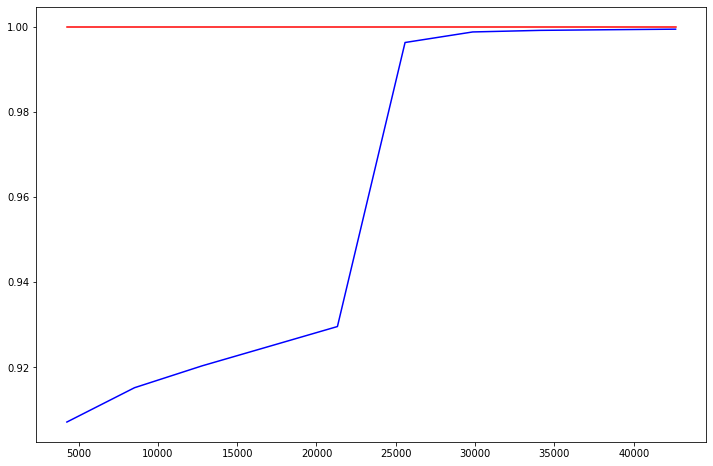

In [132]:
# OverSampling Data :
model=RandomForestClassifier(random_state=42)
evaluation(model , X_train_res , y_train_res)

[[1564   42]
 [  18 8867]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1606
           1       1.00      1.00      1.00      8885

    accuracy                           0.99     10491
   macro avg       0.99      0.99      0.99     10491
weighted avg       0.99      0.99      0.99     10491



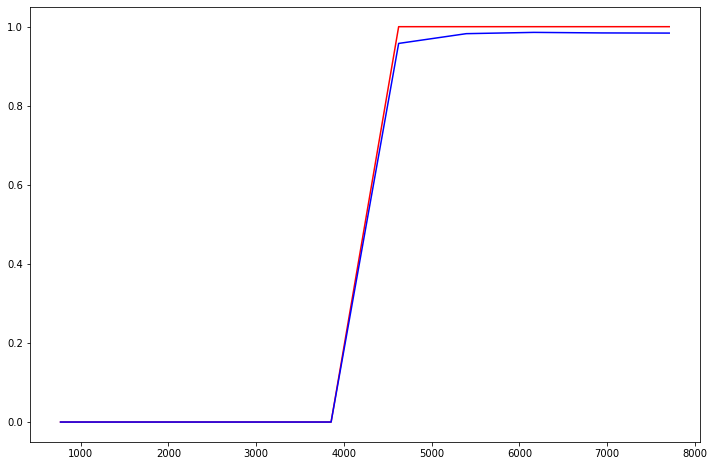

In [133]:
# UnderSampling Data : 
model=RandomForestClassifier(random_state=42)
evaluation(model , X_train_res1 , y_train_res1)

### Pour le 2 ème modèle( RandomForestClassifier) , le fait de balancer les données n 'influence pas bcp les résultats du modèle , mais l 'usage du UnderSampling  donne au minimum d erreur de prédiction de 0 FN (22 vs 45 erreurs de prédiction 
#### on donne plus l'importance a l octroie d'un crédit a une personne non solvable 

In [134]:
Model2=RandomForestClassifier(random_state=42)
Model2.fit(X_train_res1 , y_train_res1)

RandomForestClassifier(random_state=42)

## 3-  Adaptive Boosting Classifier 

### a- Unbalanced Data

[[1543   63]
 [   6 8879]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1606
           1       0.99      1.00      1.00      8885

    accuracy                           0.99     10491
   macro avg       0.99      0.98      0.99     10491
weighted avg       0.99      0.99      0.99     10491



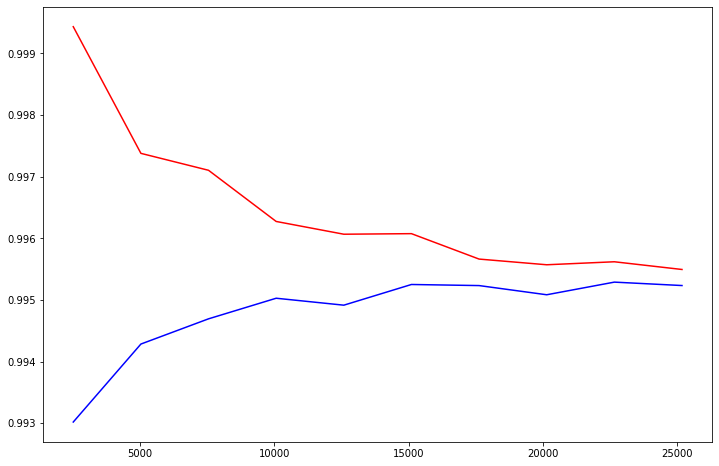

In [135]:
 # No balancing :
model=AdaBoostClassifier(random_state=42)
evaluation(model , X_train , y_train)

In [136]:
### b- Model with data balanced

[[1561   45]
 [  35 8850]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1606
           1       0.99      1.00      1.00      8885

    accuracy                           0.99     10491
   macro avg       0.99      0.98      0.99     10491
weighted avg       0.99      0.99      0.99     10491



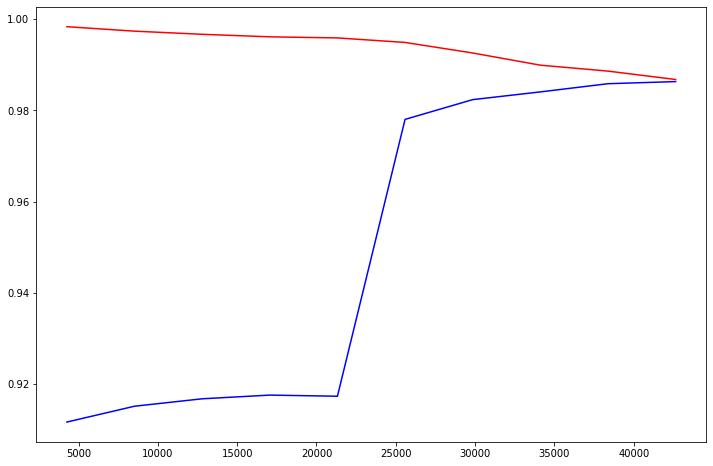

In [137]:
 # OverSampling :
model=AdaBoostClassifier(random_state=42)
evaluation(model , X_train_res , y_train_res)

[[1571   35]
 [  36 8849]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1606
           1       1.00      1.00      1.00      8885

    accuracy                           0.99     10491
   macro avg       0.99      0.99      0.99     10491
weighted avg       0.99      0.99      0.99     10491



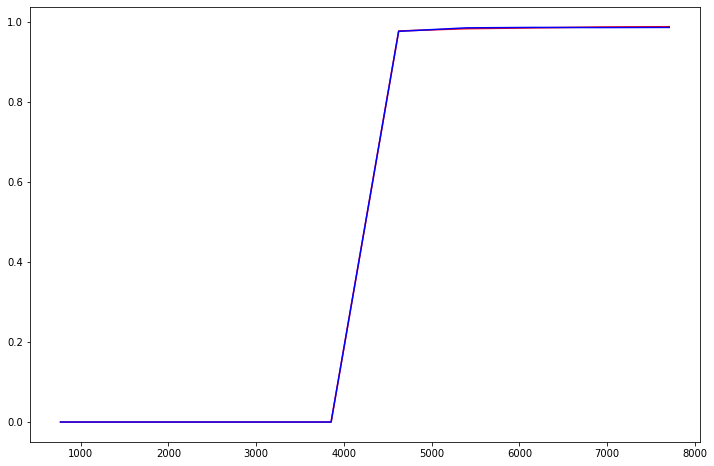

In [138]:
 # UnderSampling :
model=AdaBoostClassifier(random_state=42)
evaluation(model , X_train_res1 , y_train_res1)

### Pour le 3 ème modèle( AdaBoostClassifier) , le fait de balancer les données n 'influence pas bcp les résultats du modèle , mais l 'usage du overSampling  donne au minimum d erreur de prédiction de 0 FN (19 vs 46 erreurs de prédiction 
#### on donne plus l'importance a l octroie d'un crédit a une personne non solvable 

In [139]:
Model3=AdaBoostClassifier(random_state=42)
Model3.fit(X_train_res1 , y_train_res1)

AdaBoostClassifier(random_state=42)

# V- choix du Modèle Finale et Tuning 

## 1- Choix du Modèle Finale

In [140]:
models=[Model1,Model2,Model3]

In [141]:
list_acc=[]
list_f1=[]
list_auc=[]
for model in models : 
    y_pred=model.predict(X_test)
    list_acc.append(round(accuracy_score(y_test,y_pred),4)*100)
    list_f1.append(round(f1_score(y_test,y_pred),4)*100)
    list_auc.append(round(roc_auc_score(y_test,y_pred),4)*100)

In [142]:
results=pd.DataFrame(columns=["Accuracy","f1 Score", "ROC AUC"])
results["Accuracy"]=list_acc
results["f1 Score"]=list_f1
results["ROC AUC"]=list_auc
results.index=[ "Gradient Boosting Classifier" ,"Random Forest" ,"Adaptive Boosting Classifier"]

In [143]:
results

,Accuracy,f1 Score,ROC AUC
Gradient Boosting Classifier,99.49,99.70,99.01
Random Forest,99.43,99.66,98.59
Adaptive Boosting Classifier,99.32,99.60,98.71


## Conclusion :
#### Le Meilleure Modèle est le : Gradient Boosting Classifier

## 2- Tuning du Modèle Finale 

In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

In [145]:
parameters = {
    "loss":["log_loss"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10],
    }
#passing the scoring function in the GridSearchCV
Model1_tuned = GridSearchCV(GradientBoostingClassifier(random_state=42), parameters,cv=2, n_jobs=-1)

Model1_tuned.fit(X_train_res1 , y_train_res1)

#converting the Model1_tuned results to dataframe
#tuned_results=pd.DataFrame.from_dict(Model1_tuned.cv_results_)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'loss': ['log_loss'], 'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                         'min_samples_split': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                         'n_estimators': [10],
                         'subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0]})

In [146]:
y_pred=Model1_tuned.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[1463  143]
 [ 449 8436]]


In [147]:
y_pred=Model1.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[1579   27]
 [  27 8858]]


In [148]:
#On enregistre le modèle sans tuning 
pickle.dump(Model1,open("best_model.pkl","wb"))